<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [60]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

You should consider upgrading via the 'c:\users\crash\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [61]:
# To-Do: create a virtual environement called data_analytics
!python -m venv data_analytics

In [62]:
# Activate the environement for windows
!source data_analytics/bin/activate

'source' n?est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [63]:
# Activate the environement for linux (debian based)
!. data_analytics/bin/activate

'.' n?est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


### 2. Importing necessary tools:<a id='importing'></a>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [65]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df=pd.read_csv("kc_house_data.csv")
# To-Do: Print the dataframe's shape
df.shape

(21613, 21)

In [66]:
# To-Do: Print the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21606 non-null  object 
 2   price          21608 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21612 non-null  float64
 6   sqft_lot       21612 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21611 non-null  float64
 15  yr_renovated   21612 non-null  float64
 16  zipcode        21611 non-null  float64
 17  lat            21612 non-null  float64
 18  long  

### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [67]:
# To-Do: deal with the NAs in your dataset in one line
#Since the number of NA values is very insignificant we can just delete the rows without having to worry about losing data
df.dropna(inplace=True)


### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [68]:
# To-Do: delete the values of the variables that are useless
#These variables have been deemed unimportant and thus shall be deleted (except "id" because it still could be used for identification)
df.drop(["date","yr_built","yr_renovated","zipcode"], axis=1, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21588 non-null  int64  
 1   price          21588 non-null  float64
 2   bedrooms       21588 non-null  int64  
 3   bathrooms      21588 non-null  float64
 4   sqft_living    21588 non-null  float64
 5   sqft_lot       21588 non-null  float64
 6   floors         21588 non-null  float64
 7   waterfront     21588 non-null  int64  
 8   view           21588 non-null  int64  
 9   condition      21588 non-null  int64  
 10  grade          21588 non-null  int64  
 11  sqft_above     21588 non-null  float64
 12  sqft_basement  21588 non-null  int64  
 13  lat            21588 non-null  float64
 14  long           21588 non-null  float64
 15  sqft_living15  21588 non-null  float64
 16  sqft_lot15     21588 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 3.0 MB


### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

In [79]:
# To-Do : get to know more your data WITHOUT modifying it !!


### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

In [71]:
# To-Do : detect the outliers then delete them and delete the column created to calculate the Z-score
df["price_zscore"]=(df.price-df.price.mean())/df.price.std()
df=df[abs(df["price_zscore"]<3)]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21183 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21183 non-null  int64  
 1   price          21183 non-null  float64
 2   bedrooms       21183 non-null  int64  
 3   bathrooms      21183 non-null  float64
 4   sqft_living    21183 non-null  float64
 5   sqft_lot       21183 non-null  float64
 6   floors         21183 non-null  float64
 7   waterfront     21183 non-null  int64  
 8   view           21183 non-null  int64  
 9   condition      21183 non-null  int64  
 10  grade          21183 non-null  int64  
 11  sqft_above     21183 non-null  float64
 12  sqft_basement  21183 non-null  int64  
 13  lat            21183 non-null  float64
 14  long           21183 non-null  float64
 15  sqft_living15  21183 non-null  float64
 16  sqft_lot15     21183 non-null  int64  
 17  price_zscore   21183 non-null  float64
dtypes: flo

### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

<AxesSubplot:>

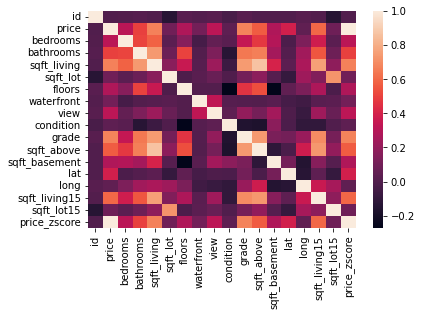

In [73]:
# To-Do : perform feature selection using correlation
corr=df.corr()
sns.heatmap(corr)

In [74]:
# To-Do : drop the variables that seem highly correlated to you
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21183 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21183 non-null  int64  
 1   price          21183 non-null  float64
 2   bedrooms       21183 non-null  int64  
 3   bathrooms      21183 non-null  float64
 4   sqft_lot       21183 non-null  float64
 5   floors         21183 non-null  float64
 6   waterfront     21183 non-null  int64  
 7   view           21183 non-null  int64  
 8   condition      21183 non-null  int64  
 9   sqft_basement  21183 non-null  int64  
 10  lat            21183 non-null  float64
 11  long           21183 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.1 MB


### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [76]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price','id'],axis = 1) 

In [77]:
from sklearn.linear_model import LinearRegression
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
model=LinearRegression()
result=model.fit(X,Y)

In [78]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
result.score(X, Y)

0.48757632740022827

## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.